In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/colab_ntbk_2/Fish.csv')

Mounted at /content/drive


In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.shape

(159, 7)

In [ ]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [ ]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

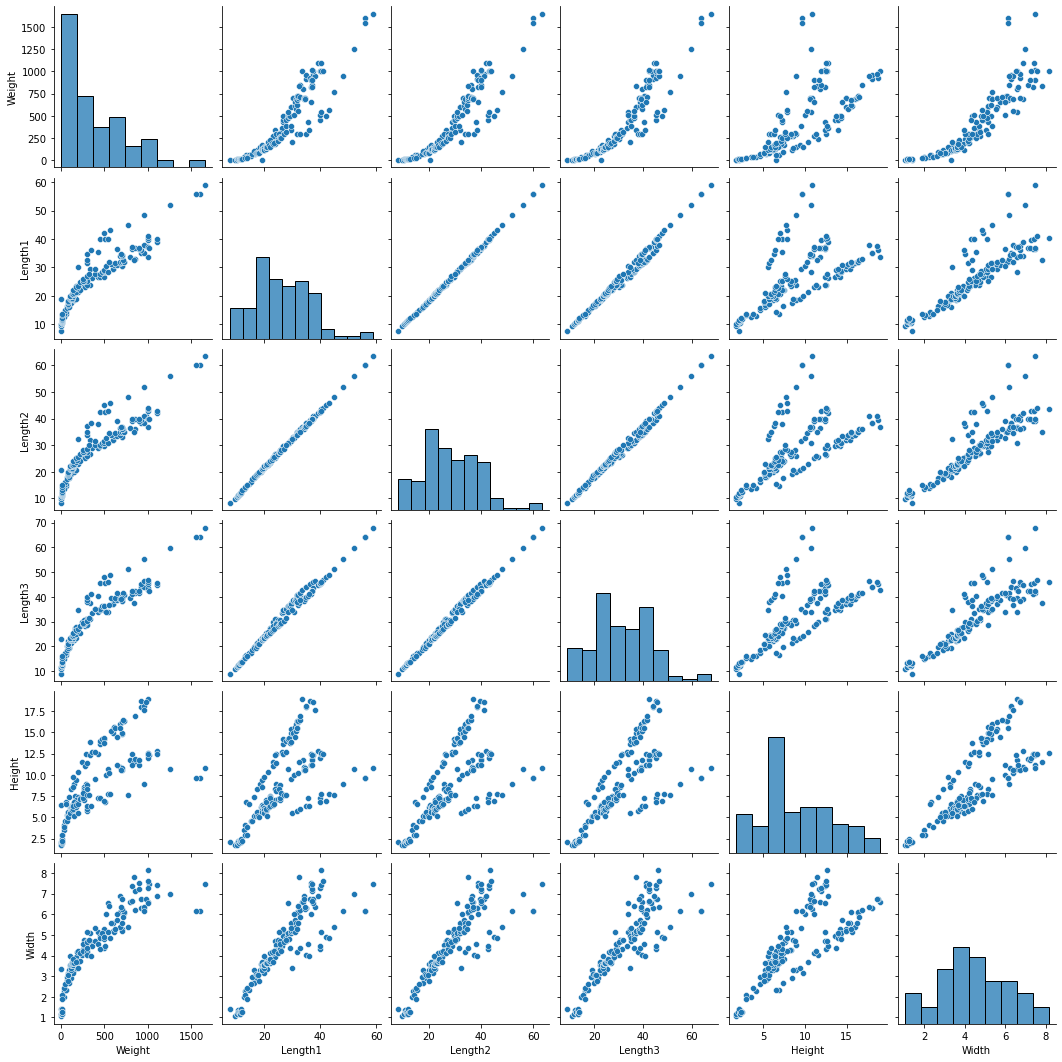

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


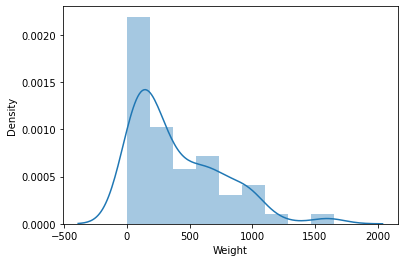

In [ ]:
sns.distplot(df['Weight'])

In [ ]:
df.skew()

<ipython-input-11-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Weight     1.104450
Length1    0.588482
Length2    0.539863
Length3    0.391541
Height     0.397186
Width      0.004972
dtype: float64

In [ ]:
X = df.drop(['Species', 'Weight'], axis = 1)
y = df['Weight']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sklearn lib

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
LinearRegression()
lin_reg_pred = lin_reg_model.predict(X_test)
lin_reg_model.intercept_

-515.3056513384333

In [ ]:
lin_reg_model.coef_

array([ 43.5352649 ,   7.82179624, -25.25670105,  23.2289123 ,
        27.06649294])

In [ ]:
lin_reg_model.score(X_train, y_train)

0.883887896537022

In [ ]:
lin_reg_model.score(X_test, y_test)

0.8821430593048694

In [ ]:
from sklearn.metrics import r2_score
r2_score(lin_reg_pred, y_test)

0.8720269140304431

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, lin_reg_pred))
print("RMSE : % f" %(rmse))

RMSE :  129.475431


In [ ]:
data = {'Actual Values': y_test, 'Predicted Values': lin_reg_pred}
prediction = pd.DataFrame(data)
prediction
     

,Actual Values,Predicted Values
78,78.0,77.685633
155,13.4,-159.124606
128,200.0,385.167355
55,270.0,300.261194
94,150.0,179.410232
29,1000.0,775.667262
147,7.0,-214.434155
51,180.0,274.909638
98,188.0,268.445110
141,1250.0,1116.011532
